In [1]:
#IMPORT LIBRARIES
import sys
import glob
import pandas as pd
import matplotlib.pyplot as plt, numpy as np
from scipy.interpolate import spline
from os import path
from itertools import *
from functools import reduce
from __future__ import division

In [2]:
#Input parameters & list/dictionaries initialization:
max_iter = 5 #maximum number of iterations
i = 0 #starting number of iteration
number_of_files = 5 #number of files in directory
width = 2.5 #mm
thickness = 0.042 #mm
area = width * thickness 

sourcePath = 'C:\\Users\\Inance\\Documents\\Thesis\\Experiments\\Tensile_Tests\\USED_CYCLIC_DATA\\SINGLE\\cyclic_warp_single'
list_of_source_files = glob.glob(sourcePath + '/*.TXT')
#outpath = 'C:\\Users\\Inance\\Documents\\Thesis\\BURST\\all_inflation_burst_txt\\CYCLIC\\CYCLIC_FIGURES'

forces = {} #initialize a dictionary
strains = {} #initialize a dictionary
Faverage = []
Saverage = []
SSaverage = []
time = []
stress = []
times = {} #initialize a dictionary
strainslist = []
forceslist = []
stresseslist = []
strainslist = np.empty((number_of_files, 0)).tolist() #creates an empty list with a certain number of lists in it.
forceslist = np.empty((number_of_files, 0)).tolist() #creates an empty list with a certain number of lists in it.
stresseslist = np.empty((number_of_files, 0)).tolist() #creates an empty list with a certain number of lists in it.

In [3]:
#Loop through files & save data in list form
def GetSourceFiles(list_of_source_files,i):
    print('GetSourceFiles')
    with open(list_of_source_files[i]) as source_file:
        print("file entered:",i+1)
        lst = [] 
        for line in source_file:
            lst.append([ float(x) for x in line.split()])
        force = np.array([ x[2] for x in lst]) 
        strain = (np.array([ x[3] for x in lst])) #*-1 
    return force,strain

In [4]:
#Save the data in a DICTIONARY (original values):
def SaveInDictionary (force,stress,strain,i):
    print('SaveInDictionary')
    forces[i] = force
    stresses[i] = stress
    strains[i] = strain
    return forces,stresses,strains

In [5]:
#Save the pressures in LISTS:
def  SaveInNewList (force,stress,strain,time,i):
    print('SaveInNEWDictionary')
    forceslist[i]=force
    stresseslist[i]=stress
    strainslist[i]=strain
    times[i]=time
    return forceslist,stresseslist,strainslist,times

In [6]:
#Determines the average pressure and time LIST:
def AverageData(forces,stresses,strains):
    for n in zip(*forces):
        Faverage.append(sum(n) / len(n))
    for m in zip(*strains):
        Saverage.append(sum(m) / len(m))
    for k in zip(*stresses):
        SSaverage.append(sum(k) / len(k))
    Taverage = [x * 0.02 for x in range(len(Faverage))] 
    return Faverage, SSaverage, Saverage,Taverage

In [7]:
def TimeGenerator(strain):
    time = [x * 0.02 for x in range(len(strain))] 
    return time

In [8]:
def StressGenerator(force):
    stress = force / area
    return stress

In [9]:
def NoiseFilter(stress,strain):
    ss = stress.tolist()
    st = strain.tolist()
    maxIndex =ss.index(max(ss))
    maxS=ss[maxIndex]
    print('max stress=', maxS)
    ss,st = zip(*[[ss[i], st[i]] for i in range(len(ss)) if i<= maxIndex]) #after max value, discard the rest of the values#only look at values where p is positive
    return ss,st

In [10]:
#Create Figures
def CreateGraphs(stresses,strains,i):
    fig, ax = plt.subplots()        # generate figure with axes
    axis_font = {'size':'12'} #customize graph
    ax.scatter(strains[i],stresses[i]) #create a scatter plot
    plt.ylabel("Stress",**axis_font),plt.xlabel("Strain",**axis_font) #name axes
    plt.show() #show graph
    #fig.savefig(path.join(outpath,"dataname_{0}.png".format(i)))
    return

GetSourceFiles
file entered: 1
length of data =  1694 1694
max stress= 362.8949523809523
SaveInNEWDictionary


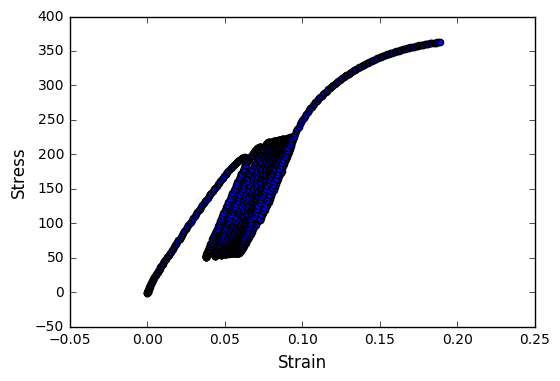

GetSourceFiles
file entered: 2
length of data =  1721 1721
max stress= 377.87019047619043
SaveInNEWDictionary


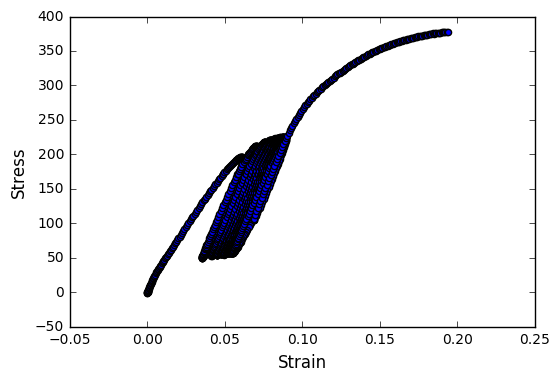

GetSourceFiles
file entered: 3
length of data =  1742 1742
max stress= 364.20723809523804
SaveInNEWDictionary


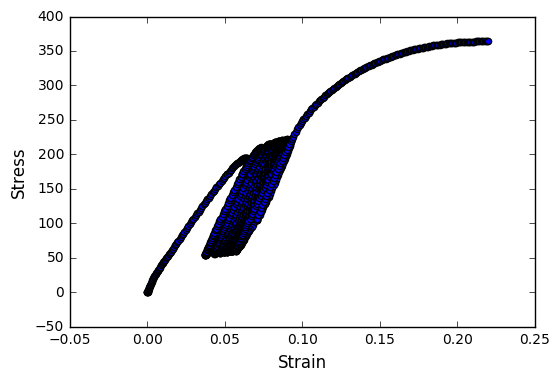

GetSourceFiles
file entered: 4
length of data =  1704 1704
max stress= 351.84819047619044
SaveInNEWDictionary


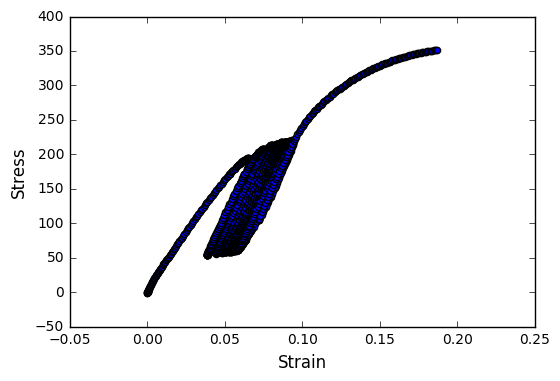

GetSourceFiles
file entered: 5
length of data =  1705 1705
max stress= 363.9945714285714
SaveInNEWDictionary


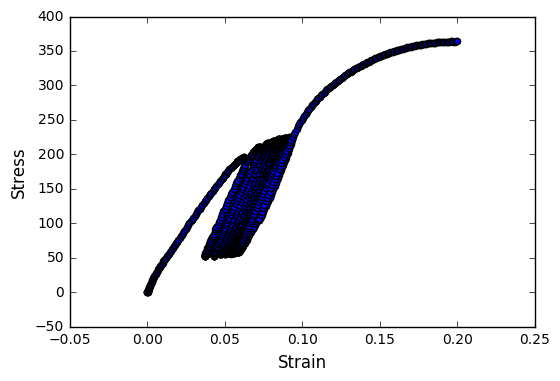

AVERAGE GRAPH OF ALL


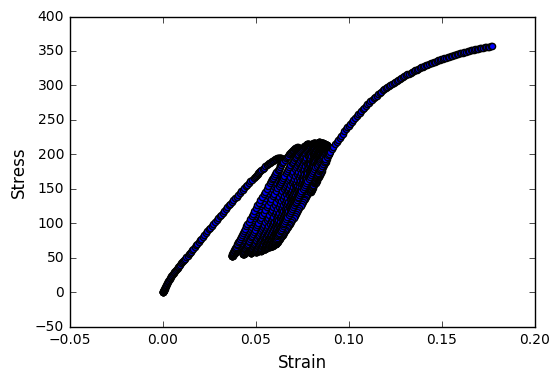

In [11]:
#MAIN!!
P = list()
while (i <= number_of_files and i!=max_iter):
    force,strain = GetSourceFiles(list_of_source_files,i) #return pressure and time from specific file
    print('length of data = ',len(force),len(strain))
    stress = StressGenerator(force)
    stress,strain = NoiseFilter(stress,strain)
    time = TimeGenerator(strain)
    forces,stresses,strains,times = SaveInNewList (force,stress,strain,time,i)
    CreateGraphs(stresses,strains,i)
    i+=1 #increment i to loop


Faverage, SSaverage, Saverage,Taverage = AverageData(forces,stresses,strains)
#Make a final graph of the averages
print("AVERAGE GRAPH OF ALL")
fig, ax = plt.subplots()# generate figure with axes
ax.scatter(Saverage, SSaverage) #create a scatter plot
axis_font = {'size':'12'} #customize graph
plt.ylabel("Stress",**axis_font),plt.xlabel("Strain",**axis_font) #name axes
plt.show() #show graph
#fig.savefig(path.join(outpath,"dataname_{0}.png".format(i)))

